In [3]:
import tensorflow as tf
from keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [6]:
max_words=10000 #Number of nost frequent words to use
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

In [7]:
num_classes = max(y_train) + 1
num_classes

np.int64(46)

In [8]:
max_sequence_length = 200 # Limit the input to the first 200 words
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

In [10]:
#One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    GlobalAveragePooling1D(), # Reduces the sequence to a single vector
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') #Softmax for multiclass classification
])

C:\Users\veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #Appropriate loss for multiclass classification
              metrics=['accuracy'])

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3449 - loss: 2.9197 - val_accuracy: 0.4185 - val_loss: 2.1526
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4236 - loss: 2.1750 - val_accuracy: 0.5008 - val_loss: 1.9071
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4989 - loss: 1.9779 - val_accuracy: 0.5698 - val_loss: 1.7026
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5761 - loss: 1.7245 - val_accuracy: 0.6221 - val_loss: 1.5845
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6193 - loss: 1.5723 - val_accuracy: 0.6633 - val_loss: 1.4683


In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 1.4889 
Test Accuracy: 0.66


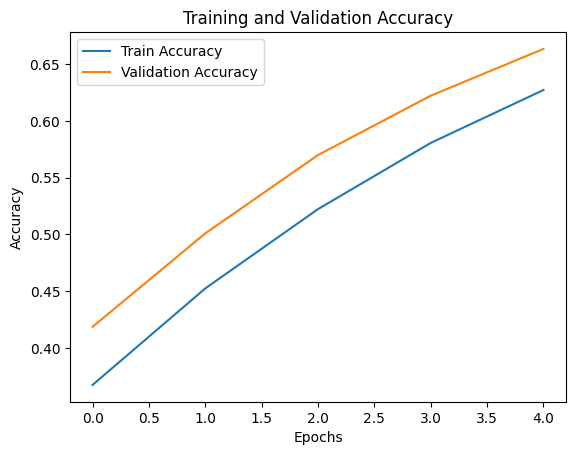

In [16]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

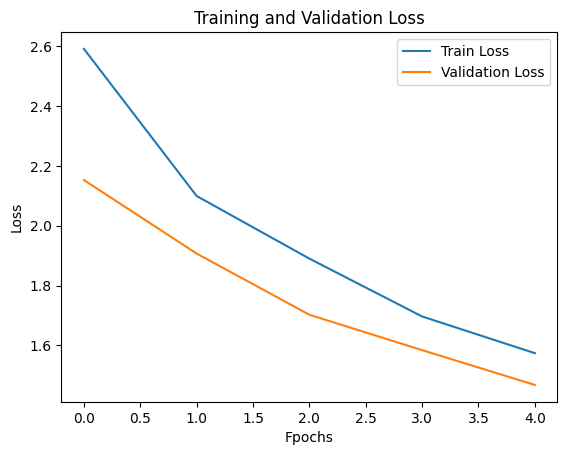

In [17]:
plt.plot(history.history ['loss'], label="Train Loss")
plt.plot(history.history ['val_loss'], label="Validation Loss")
plt.xlabel("Fpochs")
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.legend()
plt.show()